In [1]:
import pandas as pd
import numpy as np

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt
import seaborn as sns

import graphviz
import pydotplus
import io

%matplotlib inline

DATA_DIR = "C:/Users/liwei/source/repos/NTUT-Introduction-to-Data-Science/project/data/data.csv"

In [2]:
# test if everything is installed

print(pd.__version__)
print(np.__version__)

print(tree)
print(DecisionTreeClassifier)
print(train_test_split)

print(plt)
print(sns.__version__)

0.24.2
1.16.2
<module 'sklearn.tree' from 'C:\\Users\\liwei\\Anaconda3\\envs\\ai-minor-decisiontrees-venv\\lib\\site-packages\\sklearn\\tree\\__init__.py'>
<class 'sklearn.tree.tree.DecisionTreeClassifier'>
<function train_test_split at 0x000001D49968CBF8>
<module 'matplotlib.pyplot' from 'C:\\Users\\liwei\\Anaconda3\\envs\\ai-minor-decisiontrees-venv\\lib\\site-packages\\matplotlib\\pyplot.py'>
0.9.0


In [3]:
dataframe = pd.read_csv(DATA_DIR)

In [4]:
dataframe.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
dataframe.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [7]:
# splits the training and test data
train, test = train_test_split(dataframe, test_size = 0.30)

In [8]:
print("Training size: {}; Test size: {}\n".format(len(train), len(test)))

print("Training dataset dimensions: {}".format(train.shape))
print("Test dataset dimensions: {}".format(test.shape))

Training size: 212; Test size: 91

Training dataset dimensions: (212, 14)
Test dataset dimensions: (91, 14)


In [9]:
# Custom color palette
red_blue = ["#19B5FE", "#EF4836"]
palette = sns.color_palette(red_blue)
sns.set_palette(palette)
sns.set_style("white")

In [10]:
features = list(filter(lambda x: x != 'target', list(dataframe.columns)))
features

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal']

In [11]:
# for feature in features:
#     print('heartdisease_{} = feature("{}", 1)'.format(feature, feature, ))
#     print('no_heartdisease_{} = feature("{}", 0)'.format(feature, feature, ))

def feature(feature, target):
    return dataframe[dataframe["target"] == target][feature]

heartdisease_age = feature("age", 1)
no_heartdisease_age = feature("age", 0)

heartdisease_sex = feature("sex", 1)
no_heartdisease_sex = feature("sex", 0)

heartdisease_cp = feature("cp", 1)
no_heartdisease_cp = feature("cp", 0)

heartdisease_trestbps = feature("trestbps", 1)
no_heartdisease_trestbps = feature("trestbps", 0)

heartdisease_chol = feature("chol", 1)
no_heartdisease_chol = feature("chol", 0)

heartdisease_fbs = feature("fbs", 1)
no_heartdisease_fbs = feature("fbs", 0)

heartdisease_restecg = feature("restecg", 1)
no_heartdisease_restecg = feature("restecg", 0)

heartdisease_thalach = feature("thalach", 1)
no_heartdisease_thalach = feature("thalach", 0)

heartdisease_exang = feature("exang", 1)
no_heartdisease_exang = feature("exang", 0)

heartdisease_oldpeak = feature("oldpeak", 1)
no_heartdisease_oldpeak = feature("oldpeak", 0)

heartdisease_slope = feature("slope", 1)
no_heartdisease_slope = feature("slope", 0)

heartdisease_ca = feature("ca", 1)
no_heartdisease_ca = feature("ca", 0)

heartdisease_thal = feature("thal", 1)
no_heartdisease_thal = feature("thal", 0)

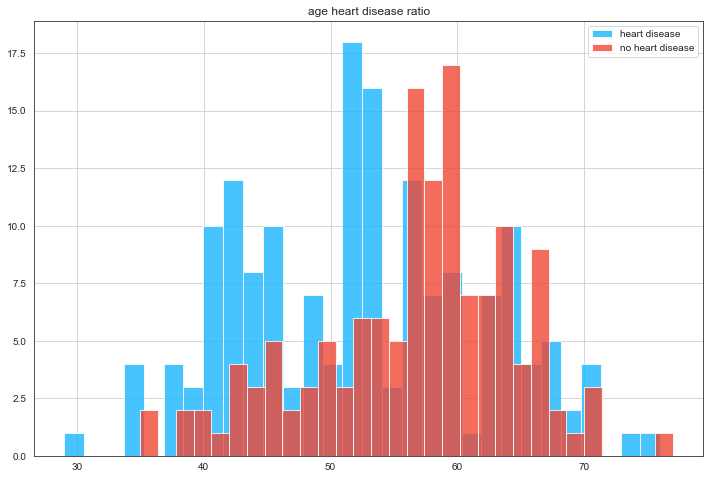

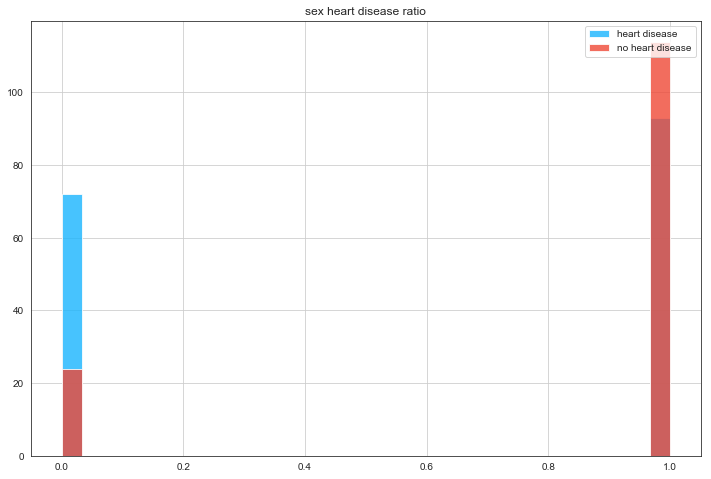

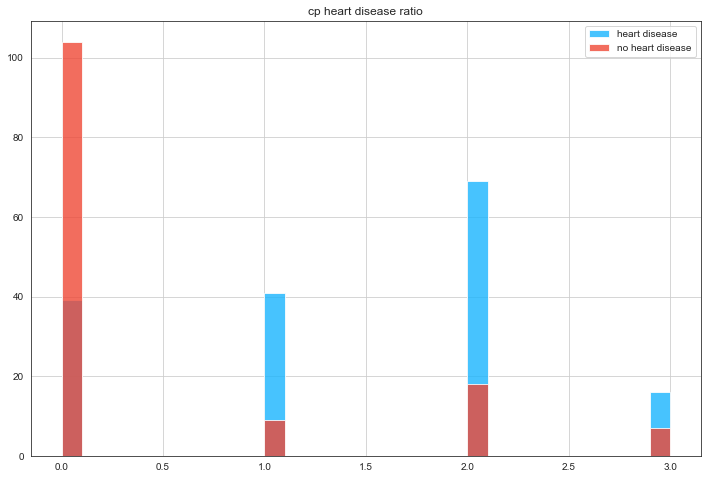

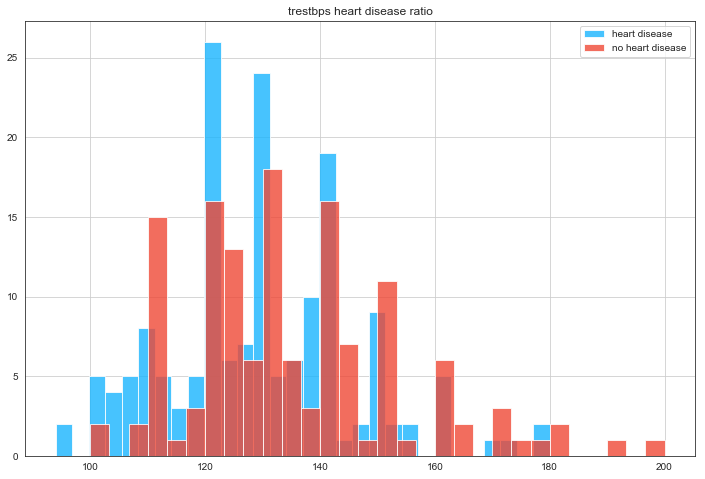

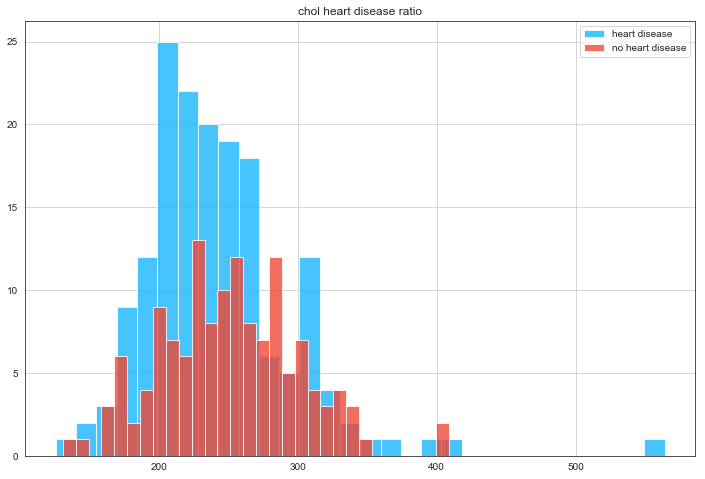

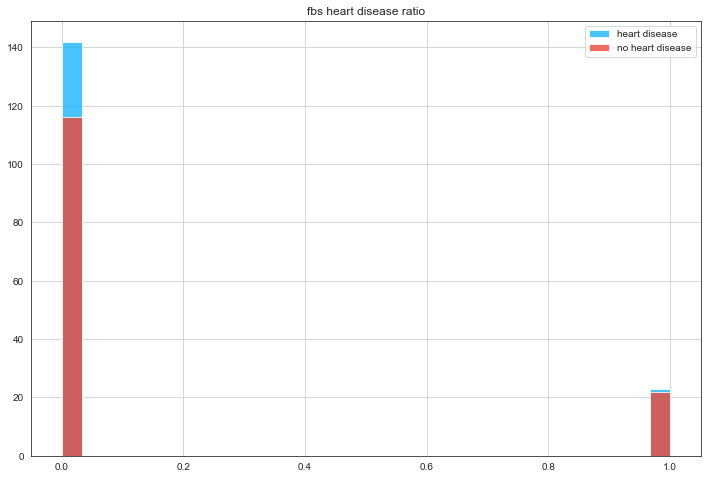

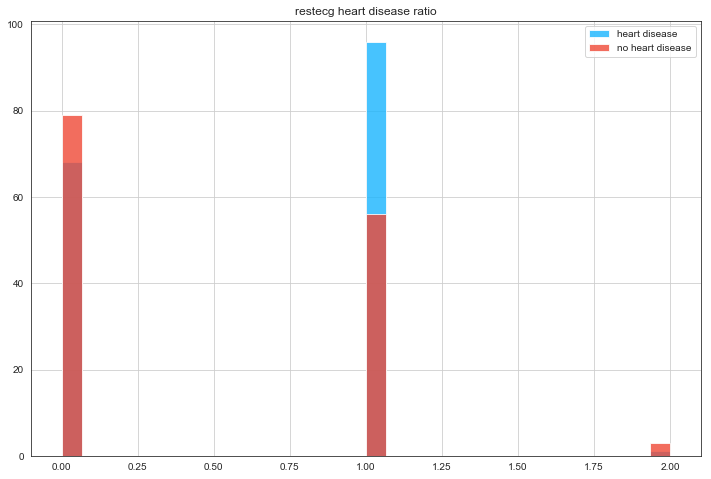

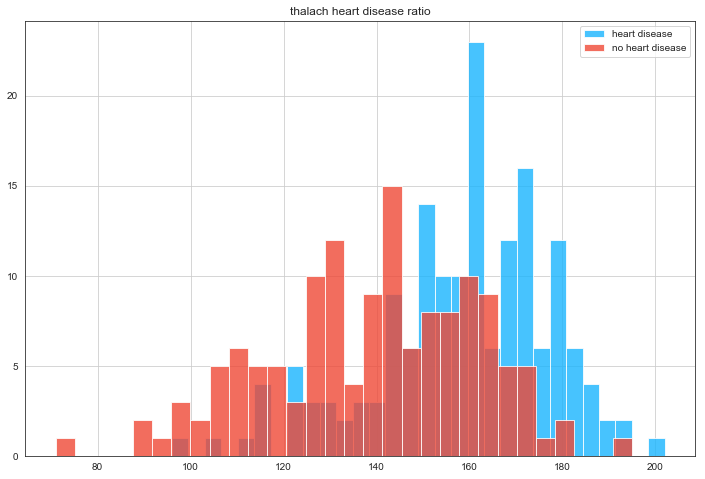

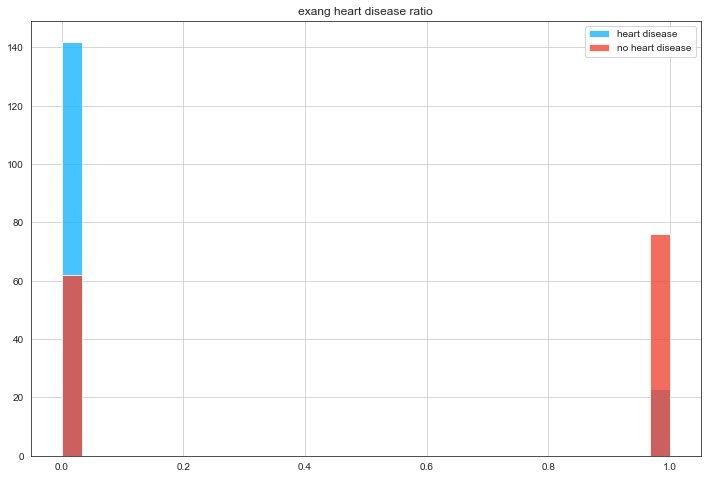

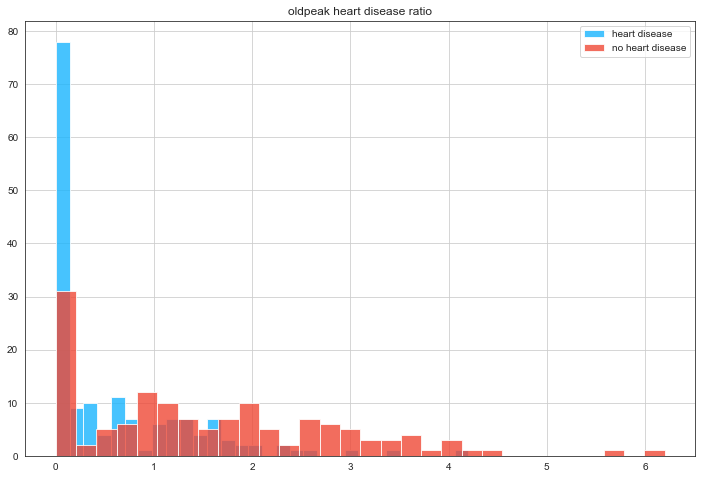

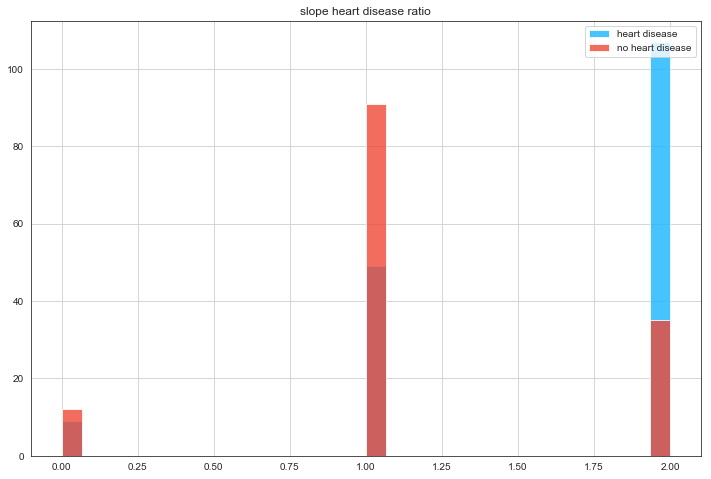

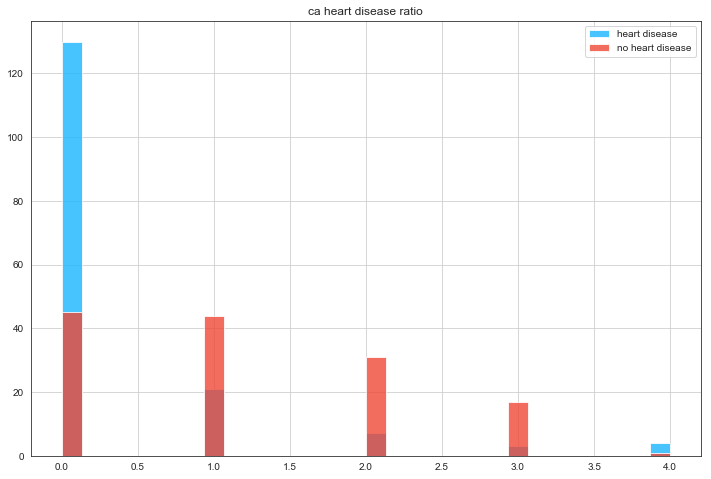

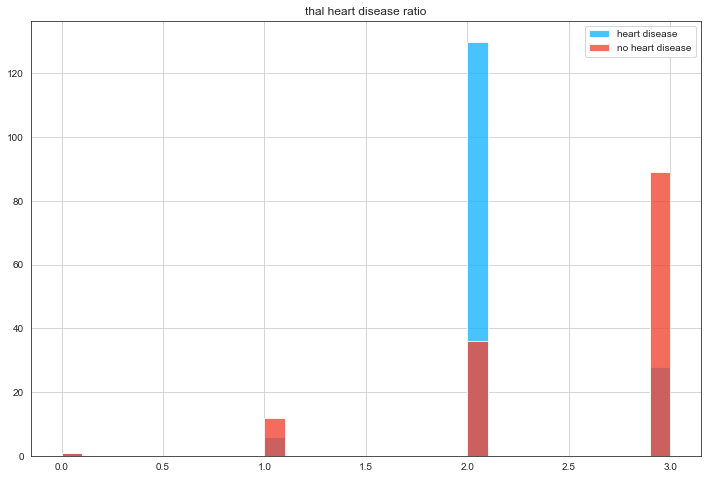

In [12]:
# for feature in features:
#     print('fig = plt.figure(figsize = (12, 8))\nplt.title("{} heart disease ratio")\nheartdisease_{}.hist(alpha = 0.8, bins = 30, label = "heart disease")\nno_heartdisease_{}.hist(alpha = 0.8, bins = 30, label = "no heart disease")\nplt.legend(loc = "upper right")\n'.format(feature, feature, feature))

fig = plt.figure(figsize = (12, 8))
plt.title("age heart disease ratio")
heartdisease_age.hist(alpha = 0.8, bins = 30, label = "heart disease")
no_heartdisease_age.hist(alpha = 0.8, bins = 30, label = "no heart disease")
plt.legend(loc = "upper right")

fig = plt.figure(figsize = (12, 8))
plt.title("sex heart disease ratio")
heartdisease_sex.hist(alpha = 0.8, bins = 30, label = "heart disease")
no_heartdisease_sex.hist(alpha = 0.8, bins = 30, label = "no heart disease")
plt.legend(loc = "upper right")

fig = plt.figure(figsize = (12, 8))
plt.title("cp heart disease ratio")
heartdisease_cp.hist(alpha = 0.8, bins = 30, label = "heart disease")
no_heartdisease_cp.hist(alpha = 0.8, bins = 30, label = "no heart disease")
plt.legend(loc = "upper right")

fig = plt.figure(figsize = (12, 8))
plt.title("trestbps heart disease ratio")
heartdisease_trestbps.hist(alpha = 0.8, bins = 30, label = "heart disease")
no_heartdisease_trestbps.hist(alpha = 0.8, bins = 30, label = "no heart disease")
plt.legend(loc = "upper right")

fig = plt.figure(figsize = (12, 8))
plt.title("chol heart disease ratio")
heartdisease_chol.hist(alpha = 0.8, bins = 30, label = "heart disease")
no_heartdisease_chol.hist(alpha = 0.8, bins = 30, label = "no heart disease")
plt.legend(loc = "upper right")

fig = plt.figure(figsize = (12, 8))
plt.title("fbs heart disease ratio")
heartdisease_fbs.hist(alpha = 0.8, bins = 30, label = "heart disease")
no_heartdisease_fbs.hist(alpha = 0.8, bins = 30, label = "no heart disease")
plt.legend(loc = "upper right")

fig = plt.figure(figsize = (12, 8))
plt.title("restecg heart disease ratio")
heartdisease_restecg.hist(alpha = 0.8, bins = 30, label = "heart disease")
no_heartdisease_restecg.hist(alpha = 0.8, bins = 30, label = "no heart disease")
plt.legend(loc = "upper right")

fig = plt.figure(figsize = (12, 8))
plt.title("thalach heart disease ratio")
heartdisease_thalach.hist(alpha = 0.8, bins = 30, label = "heart disease")
no_heartdisease_thalach.hist(alpha = 0.8, bins = 30, label = "no heart disease")
plt.legend(loc = "upper right")

fig = plt.figure(figsize = (12, 8))
plt.title("exang heart disease ratio")
heartdisease_exang.hist(alpha = 0.8, bins = 30, label = "heart disease")
no_heartdisease_exang.hist(alpha = 0.8, bins = 30, label = "no heart disease")
plt.legend(loc = "upper right")

fig = plt.figure(figsize = (12, 8))
plt.title("oldpeak heart disease ratio")
heartdisease_oldpeak.hist(alpha = 0.8, bins = 30, label = "heart disease")
no_heartdisease_oldpeak.hist(alpha = 0.8, bins = 30, label = "no heart disease")
plt.legend(loc = "upper right")

fig = plt.figure(figsize = (12, 8))
plt.title("slope heart disease ratio")
heartdisease_slope.hist(alpha = 0.8, bins = 30, label = "heart disease")
no_heartdisease_slope.hist(alpha = 0.8, bins = 30, label = "no heart disease")
plt.legend(loc = "upper right")

fig = plt.figure(figsize = (12, 8))
plt.title("ca heart disease ratio")
heartdisease_ca.hist(alpha = 0.8, bins = 30, label = "heart disease")
no_heartdisease_ca.hist(alpha = 0.8, bins = 30, label = "no heart disease")
plt.legend(loc = "upper right")

fig = plt.figure(figsize = (12, 8))
plt.title("thal heart disease ratio")
heartdisease_thal.hist(alpha = 0.8, bins = 30, label = "heart disease")
no_heartdisease_thal.hist(alpha = 0.8, bins = 30, label = "no heart disease")
plt.legend(loc = "upper right")

In [13]:
classifier = DecisionTreeClassifier(min_samples_split = 100)

In [14]:
x_train = train[features]
y_train = train["target"]

x_test = test[features]
y_test = test["target"]

In [15]:
dt = classifier.fit(x_train, y_train)

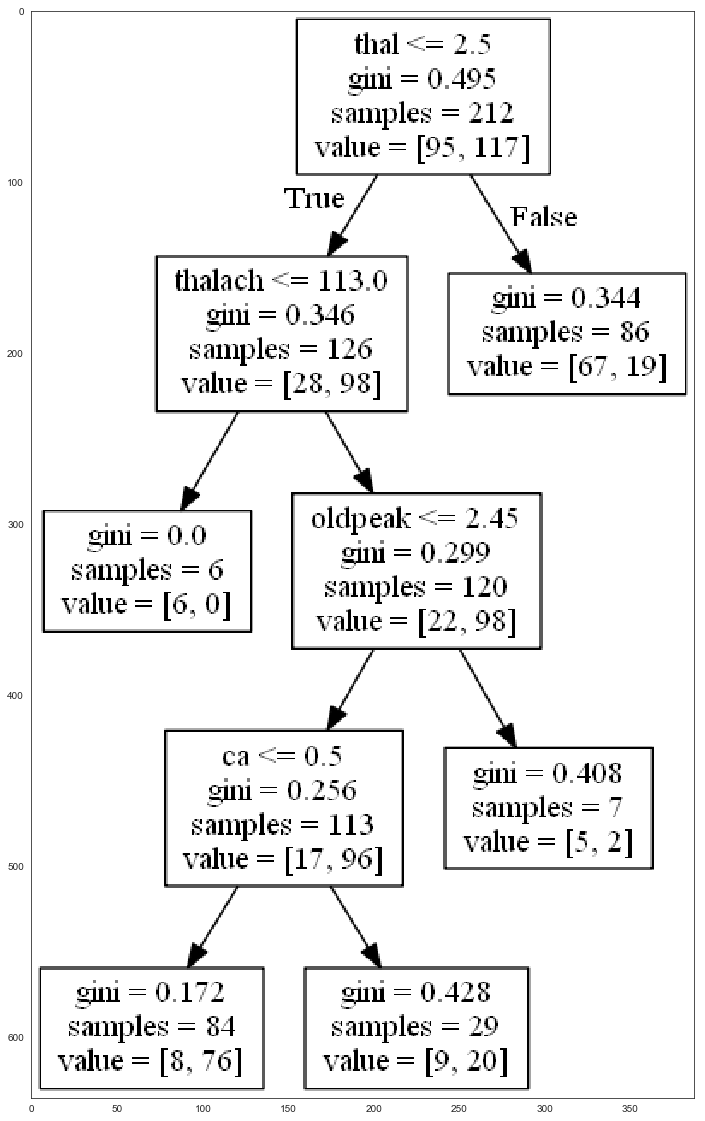

In [16]:
def show_tree(tree, features, path):
    file = io.StringIO()
    export_graphviz(tree, out_file = file, feature_names = features)
    pydotplus.graph_from_dot_data(file.getvalue()).write_png(path)
    img = plt.imread(path)
    plt.rcParams["figure.figsize"] = [20, 20]
    plt.imshow(img)

show_tree(dt, features, "heartdisease_dt.png")    

In [17]:
y_pred = classifier.predict(x_test)

In [18]:
from sklearn.metrics import accuracy_score

score = accuracy_score(y_test, y_pred) * 100
print("The accuracy of this Decision Tree: {}%".format(round(score, 2)))

The accuracy of this Decision Tree: 73.63%
